Startup Valuation Dataset: https://www.kaggle.com/datasets/manishkc06/startup-success-prediction


In [ ]:
# import relevant Python libraries
import numpy as np
import pandas as pd
from scipy import stats as sps
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix


In [ ]:
df = pd.read_csv("startup data.csv")
pd.DataFrame.head(df)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


# Brief exploration of the dataset 
The dataset has a total of 923 samples, and 48 features with the dependent feature being the startup status. There are certain columns that have duplicate data: these are the features that are presented as categorical but are also one hot encoded as well right after. This can be seen specficially with the state_code columns being broken down into one-hot encoded columns such as is_CA, is_NY, etc. There are also features that are categorical and not one-hot encoded such as status. This indicates that theres a need duplicate feature removal and one-hot encoding as part of pre-processing.

In [ ]:
print('number of features:', len(df.columns))
print('number of samples:', len(df))

number of features: 49
number of samples: 923


#Pre-processing of the data
Here I got rid of repetitive columns and I got rid of features that I felt were irrelevant to determining the success of a startup such as Longitude and Latitude. I also changed the values of the status feature which stores the value of if a startup has been "acquired" or "closed" to represent 1 and 0 respectively since we cannot have string values.

In [ ]:
df.drop(columns=['id', 'founded_at', 'category_code', 'closed_at', 'first_funding_at','state_code', 'last_funding_at', 'state_code', 'name', 'city', 'age_first_funding_year', 'milestones', 'state_code.1', 'age_last_milestone_year','labels','age_first_milestone_year','relationships', 'age_last_funding_year', 'Unnamed: 0', 'latitude', 'longitude', 'zip_code', 'Unnamed: 6', 'object_id'], inplace=True)
df["status"] = df["status"].map({"acquired": 0, "closed": 1})
print(df)


     funding_rounds  funding_total_usd  is_CA  is_NY  is_MA  is_TX  \
0                 3             375000      1      0      0      0   
1                 4           40100000      1      0      0      0   
2                 1            2600000      1      0      0      0   
3                 3           40000000      1      0      0      0   
4                 2            1300000      1      0      0      0   
..              ...                ...    ...    ...    ...    ...   
918               1            1100000      1      0      0      0   
919               3           52000000      0      0      1      0   
920               1           44000000      1      0      0      0   
921               2           15500000      1      0      0      0   
922               1           20000000      1      0      0      0   

     is_otherstate  is_software  is_web  is_mobile  ...  is_othercategory  \
0                0            0       0          0  ...                 1   
1    

#Feature Learning

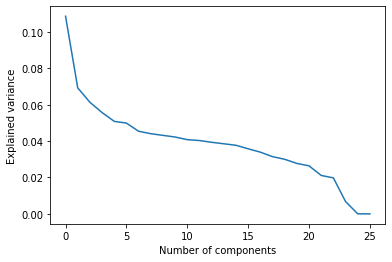

In [ ]:
#getting rid missing values - replaces NaN values with a constant
imputer = SimpleImputer()
df_imputed = imputer.fit_transform(df)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Plot the explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

#based off the chart we can see that the optimized number of components is around 17 before the graph drops

pca = PCA(n_components=17)
df_pca = pca.fit_transform(df_scaled)


X = df_pca
y = df[['status']]


#Model 1: Conducting Logistic Regression

In [ ]:

# Split the data into training and test sets : 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

#perform Cross Validation using 10 folds
logisticCV = cross_val_score(model, X_train, y_train, cv=10)

# Train the model on the training data
model.fit(X_train, y_train)

logistic_pred = model.predict(X_test)

print('Logisitic Regression Cross Validation Mean score:', logisticCV.mean())



Logisitic Regression Cross Validation Mean score: 0.8523694927804517


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

#Model 2: Conducting SVM on the dataset

In [ ]:

# create an SVM model with a linear kernel
SVMmodel = SVC(kernel='linear')

SVMCV = cross_val_score(SVMmodel, X_train, y_train, cv=10)

# fit the model to the training data
SVMmodel.fit(X_train, y_train)

SVMpredict = SVMmodel.predict(X_test)
# evaluate the model on the testing data

print('SVM Cross Validation Mean score:', SVMCV.mean())


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVM Cross Validation Mean score: 0.8564050351721585


#Comparative Analysis
Based off the comparative analysis we can see that the SVM model has a higher classification accuracy of 0.9 compare to the 0.88 of the logistic regression model. The SVM model also has a higher F1 score of 0.88 compared to the 0.86 F1 score of the logistic regression model. Lastly, the SVM model has a higher TP of 106 compared to 102 plus a lower TN rate of 6 compared to 10 of the logistic regression model. Given that the SVM model was comparitively better than the logistic regression model in three different analysis, we can conclude that the SVM model would be best to go with.

In [ ]:

SVMaccuracy = accuracy_score(y_test, SVMpredict)
SVMf1 = f1_score(y_test, SVMpredict)
logisticaccuracy = accuracy_score(y_test, logistic_pred)
logisticF1 = f1_score(y_test, logistic_pred)

confusion_matrix_logistic = confusion_matrix(y_test, logistic_pred)
confusion_matrix_SVM = confusion_matrix(y_test, SVMpredict)

# Print the results
print('\nSVM:')
print('Classification accuracy:', SVMaccuracy )
print('F1 score:', SVMf1)
print('Confusion matrix SVM:')
print(confusion_matrix_SVM)

print('\nLogistic Regression:')
print('Classification accuracy:', logisticaccuracy )
print('F1 score:', logisticF1)
print('Confusion matrix Logistic:')
print(confusion_matrix_logistic)


SVM:
Classification accuracy: 0.9081081081081082
F1 score: 0.8794326241134752
Confusion matrix SVM:
[[106   6]
 [ 11  62]]

Logistic Regression:
Classification accuracy: 0.8864864864864865
F1 score: 0.8551724137931035
Confusion matrix Logistic:
[[102  10]
 [ 11  62]]


#Discussion on ethical issues for each dataset/task

There may be a bias that this model entails as there are a lot of other factors not included in this data set that could determine a startups success that cannot be quantified such as team background and experience. In addition this dataset is only contains data of startups in the US, so this cannot be representative of startups from the rest of the world. Given the model couldn't compare data from other regions, this model may not be accurate. Many Venture Capitalists may utilize a similar model to this to help decide which startups are worth investing in and this could be an ethical issue as such models can only help procide a direction and not determine a discrete output. This model may not be fair for venture capitalists to use as this could lead to certain startups more likely to recieve funding over other startups on a biased basis. 

Also, hypothetically if this model is widely distributed, this would only encourage entreprenuers to mold startup ideas that fit this machine learning model just so they can recieve funding, this could lead to a plateau in innovation.


#Bibliography
Here I provide links I used to help me conduct the following machine learning tasks for this data set: 

[1] [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html#:~:text=The%20simplest%20way%20to%20use,the%20estimator%20and%20the%20dataset.&text=%3E%3E%3E-,%3E%3E%3E%20from%20sklearn.,%3E%3E%3E%20clf%20%3D%20svm.)

[2] [Logistic Regression](https://www.projectpro.io/recipes/perform-logistic-regression-sklearn)

[3] [SVM](https://datagy.io/python-support-vector-machines/)

